In [16]:
import json
import pickle
import re

from matplotlib import pyplot as plt
from nltk.corpus import stopwords
import numpy as np

In [40]:
def add_attr(stats, attr, attr_dict):
    for day in stats:
        for track in stats[day]:
            song = track['song']
            artist = track['artist']
            a = attr_dict.get((song, artist))
            track[attr] = a
            
            
def get_genre(track):
    if not track['meta']:
        return ['Unknown']
    genre_list = track['meta']['primary_genres']['music_genre_list']
    if not genre_list:
        return ['Unknown']
    genres = [genre_dict['music_genre']['music_genre_name'] for genre_dict in genre_list]
    return genres


def get_lyrics(stats):
    genre_lyric_dict = {}
    for date in stats:
        for track in stats[date]:
            genres = get_genre(track)
            lyrics = track['lyrics']
            if not lyrics:
                continue
            for genre in genres:
                lyric_set = genre_lyric_dict.get(genre, set())
                lyric_set.add(lyrics)
                genre_lyric_dict[genre] = lyric_set
    return genre_lyric_dict


def preprocess(lyrics):
    en_stop = stopwords.words('english')
    lyrics = [word.lower() for word in re.split(r'\s', lyrics) if word.lower() not in en_stop and word.isalpha()]
    return lyrics

def get_ttr(genre_lyrics, threshold=5):
    ttr_dict = {}
    for genre, lyrics in genre_lyrics.items():
        # Avoid skewing results
        if len(lyrics) < threshold:
            continue
        ttr_lst = []
        for l in lyrics:
            l = preprocess(l)
            ttr = len(set(l))/len(l)
            ttr_lst.append(ttr)
        ttr_avg = np.mean(ttr_lst)
        ttr_dict[genre] = ttr_avg
    return ttr_dict

In [5]:
with open('spotify_top_200_with_meta_20170101-20180101.json') as f1, open('spotify_lyrics.pkl', 'rb') as f2, open('spotify_lyrics_freq.pkl', 'rb') as f3:
    stats = json.load(f1)
    lyrics = pickle.load(f2)
    lyrics_count = pickle.load(f3)

In [10]:
# add lyrics
add_attr(stats, 'lyrics', lyrics)
# get unique lyrics for each genre
genre_lyric_dict = get_lyrics(stats)

In [41]:
# Get average type-token ratio for each genre
ttr_dict = get_ttr(genre_lyric_dict, threshold=5)

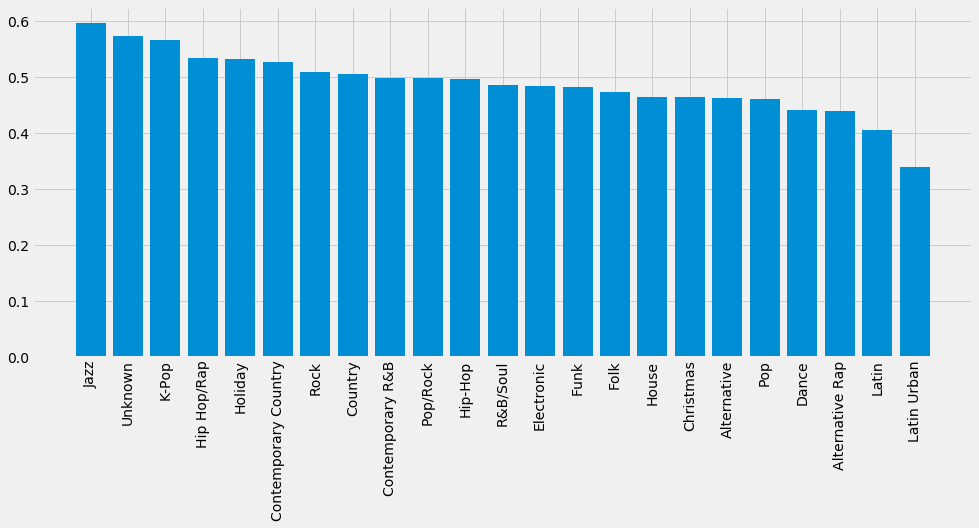

In [42]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15, 6))
labels, values = zip(*sorted(ttr_dict.items(), key=lambda x: x[1], reverse=True))
ax.bar(labels, values)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
plt.show()

In [44]:
# The few songs still skew the results
print('Hip Hop/Rap:', len(genre_lyric_dict['Hip Hop/Rap']))
print('Jazz:', len(genre_lyric_dict['Jazz']))

Hip Hop/Rap: 356
Jazz: 7


In [47]:
# Doesn't seem that diverse to me
print(list(genre_lyric_dict['Jazz'])[0])

Here's a little song I wrote
You might want to sing it note for note
Don't worry, be happy
In every life we have some trouble
But when you worry you make it double
Don't worry, be happy
Don't worry, be happy now

Don't worry, be happy
Don't worry, be happy
Don't worry, be happy
Don't worry, be happy

Ain't got no place to lay your head
Somebody came and took your bed
Don't worry, be happy
The landlord say your rent is late
He may have to litigate
Don't worry, be happy
Don't worry, be happy (Look at me, I'm happy)

Don't worry, be happy
(Hey I'll give you my phone number, when you worry call me I'll make you happy!)
Don't worry, be happy

Ain't got no cash, ain't got no style
Ain't got no gal to make you smile
But don't worry, be happy
'Cause when you worry your face will frown
And that will bring everybody down
So don't worry, be happy
Don't worry, be happy now

Don't worry, be happy
Don't worry, be happy
Don't worry, be happy
Don't worry, be happy

Now there is the song I wrote
I hope

In [53]:
# Maybe the common use of English in K-Pop increases the type count on average?
print(list(genre_lyric_dict['K-Pop'])[0])

이 모든건 우연이 아냐
그냥 그냥 나의 느낌으로
온 세상이 어제완 달라
그냥 그냥 너의 기쁨으로
네가 날 불렀을 때 나는 너의 꽃으로
기다렸던 것 처럼 우리 시리도록 펴
어쩌면 우주의 섭리 그냥 그랬던 거야
You know, I know
너는 나, 나는 너

설레는 만큼 많이 두려워 운명이 우릴 자꾸 질투해서
너만큼 나도 많이 무서워
When you see me
When you touch me
우주가 우릴 위해 움직였어
조금의 어긋남 조차 없었어
너와 내 행복은 예정됐던 걸
Cause you love me and I love you

넌 내 푸른 곰팡이
날 구원해준 나의 천사 나의 세상
난 네 삼색 고양이 널 만나러 온
Love me now
Touch me now

Just let me love you (let me, love, let me love you)
Just let me love you (let me, love, let me love you)
우주가 처음 생겨났을 때부터 모든 건 정해진 거였어
Just let me love you (let me, love, let me love you)

Let me love, let me love you
Let me love, let me love you


In [54]:
print(list(genre_lyric_dict['Latin Urban'])[0])

Maluma baby

Apenas sale el sol y tú te vas corriendo
Sé que pensarás que esto me está doliendo
Yo no estoy pensando en lo que estás haciendo
Si somos ajenos y así nos queremos (mm-mm-mm)

Si conmigo te quedas, o con otro tú te vas
No me importa un carajo porque sé que volverás
Si conmigo te quedas, o con otro tú te vas
No me importa un carajo porque sé que volverás

Y si con otro pasas el rato
Vamo' a ser feliz, vamo' a ser feliz, felices los 4
Te agrandamo' el cuarto
Y si con otro pasas el rato
Vamo' a ser feliz, vamo' a ser feliz, felices los 4
Yo te acepto el trato

Y lo hacemo' otro rato
Y lo hacemo' otro rato
Y lo hacemo' otro rato
Y lo hacemo' otro rato (alright-alright, baby)

Y lo hacemo' otro rato
Lo nuestro no depende de un pacto
Disfruta y sólo siente el impacto
El boom boom que te quema, ese cuerpo de sirena
Tranquila que no creo en contratos (y tú menos...)

Y siempre que se va, regresa a mí, y felices los 4
No importa el qué dirán, nos gusta así
(Te agrandamos el cuarto,